In [3]:
import pandas as pd

In [5]:
CCTV_Seoul = pd.read_csv('../data/01.CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [6]:
print(type(CCTV_Seoul))

<class 'pandas.core.frame.DataFrame'>


In [7]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [8]:
CCTV_Seoul.columns[0]

'기관명'

In [9]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [10]:
pop_Seoul = pd.read_excel('../data/01.population_in_Seoul.xls',
                          header = 2,
                          usecols = 'B,D,G,J,N',
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [11]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [12]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [13]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [14]:
CCTV_Seoul['최근증가율']= (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                     CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [15]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [16]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171
5,광진구,370519,355748,14771,44806


In [17]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [18]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수']*100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수']*100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163569,153780,9789,26512,5.984630,16.208450
2,중구,135427,126032,9395,21798,6.937317,16.095756
3,용산구,245245,229677,15568,37331,6.347938,15.221921
4,성동구,316068,308066,8002,42171,2.531734,13.342382
5,광진구,370519,355748,14771,44806,3.986570,12.092767


In [20]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673161,666439,6722,79093,0.998572,11.749492
16,강서구,606981,600257,6724,78042,1.107778,12.857404
11,노원구,553177,549365,3812,75741,0.689110,13.692001
23,강남구,551888,546952,4936,66011,0.894384,11.960941
21,관악구,521960,504048,17912,71317,3.431681,13.663308


In [21]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404501,369003,35498,54994,8.775751,13.595516
17,구로구,440305,407235,33070,60564,7.510703,13.755011
18,금천구,252752,233263,19489,34945,7.710720,13.825806
21,관악구,521960,504048,17912,71317,3.431681,13.663308
6,동대문구,364527,348903,15624,56675,4.286102,15.547545


In [22]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,379,99,155,377,166.490765,437050,432749,4301,57680,0.984098,13.197575
2,강북구,831,369,120,138,204,125.203252,326063,322385,3678,57401,1.128003,17.604267
3,강서구,911,388,258,184,81,134.793814,606981,600257,6724,78042,1.107778,12.857404
4,관악구,2109,846,260,390,613,149.290780,521960,504048,17912,71317,3.431681,13.663308


In [23]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                      'A' : ['A0','A1', 'A2', 'A3'],
                      'B' : ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key' : ['K0', 'K4', 'K2', 'K3'],
                      'C' : ['C0', 'C1', 'C2', 'C3'],
                      'D' : ['D0', 'D1', 'D2', 'D3']})

In [24]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [26]:
right

,key,C,D
0,K0,C0,D0
1,K4,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [27]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [28]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575
2,강북구,831,125.203252,326063,322385,3678,57401,1.128003,17.604267
3,강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404
4,관악구,2109,149.290780,521960,504048,17912,71317,3.431681,13.663308


In [29]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575
강북구,831,125.203252,326063,322385,3678,57401,1.128003,17.604267
강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404
관악구,2109,149.290780,521960,504048,17912,71317,3.431681,13.663308


In [30]:
import pandas as pd
import numpy as np

In [31]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.26836087],
       [-0.26836087,  1.        ]])

In [32]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.04749504],
       [-0.04749504,  1.        ]])

In [34]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.22536935],
       [0.22536935, 1.        ]])

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

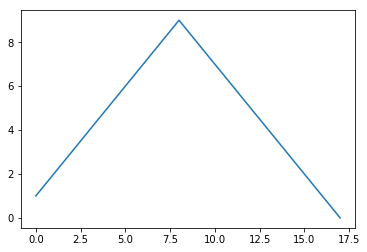

In [37]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [38]:
import platform

from matplotlib import font_manager, rc
plt.rcParams ['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system. Sorry.')

In [39]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575
강북구,831,125.203252,326063,322385,3678,57401,1.128003,17.604267
강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404
관악구,2109,149.290780,521960,504048,17912,71317,3.431681,13.663308


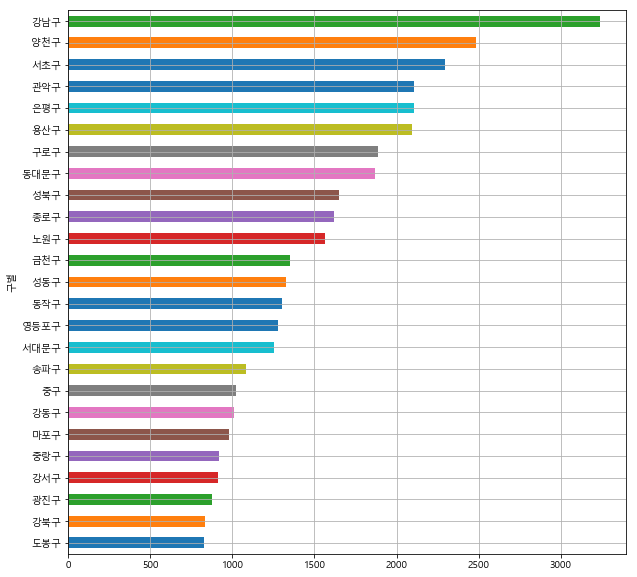

In [42]:
plt.figure()
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

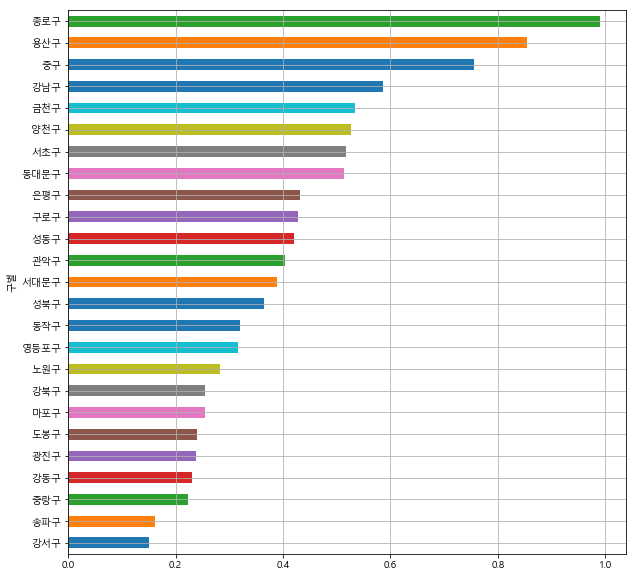

In [50]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

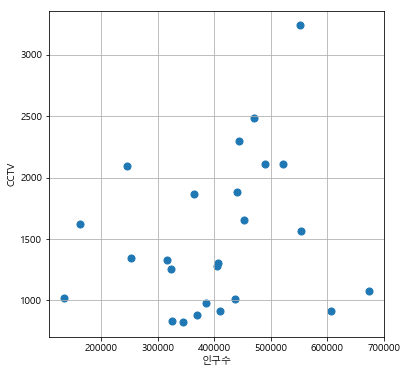

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [45]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.08389848e-03, 1.07787951e+03])

In [46]:
f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)

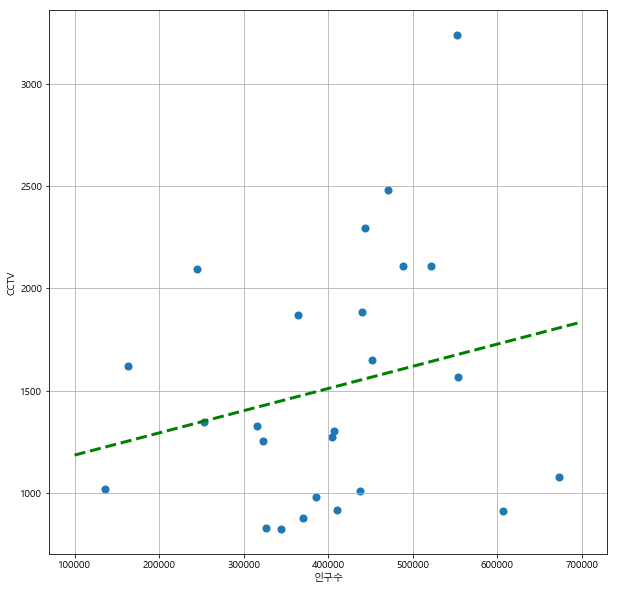

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()